##Importing Libraries

In [1]:
import math
import statistics
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##Importing the Class and Function file

In [2]:
from google.colab import files
files.upload()

{}

In [3]:
from lifeexpectancydata import LifeExpectencyData
from lifeexpectancydata import LifeExpectencyDataFrame
from lifeexpectancydata import LifeExpectancyEDA

In [4]:
life_Exp_India = LifeExpectencyData.read_LifeExpectency_File('/content/sample_data/India Life Expectancy.csv')
pollution = LifeExpectencyData.read_Pollution_File('/content/sample_data/Pollution.csv')
# life_Exp_India = pd.read_csv('/content/India Life Expectancy.csv')
# pollution = pd.read_csv('/content/Pollution.csv')


Life Expectency File read successfully
Pollution File read successfully


In [5]:
LifeExpectencyData.get_LifeExpectency_HeadData(life_Exp_India)

,Rank,State,Life_Expectancy_at_Birth,Avg_Life_Expectancy,Male,Female,Literacy_Rate,Undernutrition
0,13,Andhra Pradesh,68.5,70.25,68.4,72.1,67.66,32.5
1,21,Assam,63.9,66.20,65.6,66.8,73.18,36.4
2,14,Bihar,68.1,69.90,69.6,70.2,63.82,55.9
3,18,Chhattisgarh,64.8,63.60,61.6,65.7,71.04,47.1
4,3,Delhi,73.2,72.85,71.8,73.9,86.34,26.1


In [6]:
LifeExpectencyData.get_Pollution_HeadData(pollution)

,States,Avg_tobacco_alcohol(%),Women_tobacco_alcohol(%),Men_tobacco_alcohol (%),Pollution_SO2,Pollution_NO2,Pollution_PM10
0,Andhra Pradesh,14.05,2.10,26.00,7,23,73
1,Assam,42.50,19.25,65.95,8,16,81
2,Bihar,28.33,3.82,52.85,4,32,212
3,Chattisgarh,39.50,21.07,58.05,10,24,103
4,Delhi,17.84,2.15,33.53,7,66,278


In [7]:
#life_Exp_India.head()

In [8]:
#pollution.head()

##1. Loading data in to DataFrames.

In [9]:
life_Exp_DF_India = pd.DataFrame(life_Exp_India)

In [10]:
DF_Pollution = pd.DataFrame(pollution)

##2. Check the Data Types of your data columns.

In [11]:
#life_Exp_DF_India.info()
LifeExpectencyDataFrame.get_DF_India_Info(life_Exp_DF_India)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rank                      21 non-null     int64  
 1   State                     21 non-null     object 
 2   Life_Expectancy_at_Birth  21 non-null     float64
 3   Avg_Life_Expectancy       21 non-null     float64
 4   Male                      21 non-null     float64
 5   Female                    21 non-null     float64
 6   Literacy_Rate             21 non-null     float64
 7   Undernutrition            21 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.4+ KB


In [12]:
LifeExpectencyDataFrame.get_DF_Pollution_Info(DF_Pollution)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   States                    21 non-null     object 
 1   Avg_tobacco_alcohol(%)    21 non-null     float64
 2   Women_tobacco_alcohol(%)  21 non-null     float64
 3   Men_tobacco_alcohol (%)   21 non-null     float64
 4   Pollution_SO2             21 non-null     int64  
 5   Pollution_NO2             21 non-null     int64  
 6   Pollution_PM10            21 non-null     int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 1.3+ KB


3. Drop any NULL, missing values or unwanted columns.


In [13]:
#life_Exp_DF_India.isnull().sum()
LifeExpectencyDataFrame.get_DF_India_NullValues(life_Exp_DF_India)

Rank                        0
State                       0
Life_Expectancy_at_Birth    0
Avg_Life_Expectancy         0
Male                        0
Female                      0
Literacy_Rate               0
Undernutrition              0
dtype: int64

In [14]:
#DF_Pollution.isnull().sum()
LifeExpectencyDataFrame.get_DF_Pollution_NullValues(DF_Pollution)

States                      0
Avg_tobacco_alcohol(%)      0
Women_tobacco_alcohol(%)    0
Men_tobacco_alcohol (%)     0
Pollution_SO2               0
Pollution_NO2               0
Pollution_PM10              0
dtype: int64

4. Drop duplicate values.

In [15]:
#life_Exp_DF_India.drop_duplicates()
LifeExpectencyDataFrame.get_DF_India_DropDuplicates(life_Exp_DF_India)

,Rank,State,Life_Expectancy_at_Birth,Avg_Life_Expectancy,Male,Female,Literacy_Rate,Undernutrition
0,13,Andhra Pradesh,68.5,70.25,68.4,72.1,67.66,32.5
1,21,Assam,63.9,66.20,65.6,66.8,73.18,36.4
2,14,Bihar,68.1,69.90,69.6,70.2,63.82,55.9
3,18,Chhattisgarh,64.8,63.60,61.6,65.7,71.04,47.1
4,3,Delhi,73.2,72.85,71.8,73.9,86.34,26.1
5,11,Gujarat,68.7,69.50,67.4,71.8,79.31,44.6
6,12,Haryana,68.6,69.60,68.0,71.4,76.64,39.6
7,5,Himachal Pradesh,71.6,72.30,69.4,75.5,83.78,36.5
8,2,Jammu & Kashmir,73.6,73.50,71.6,76.2,68.74,25.6
9,16,Jharkhand,66.6,66.15,65.5,66.8,67.63,56.5


In [16]:
#DF_Pollution.drop_duplicates()
LifeExpectencyDataFrame.get_DF_Pollution_DropDuplicates(life_Exp_DF_India)

,Rank,State,Life_Expectancy_at_Birth,Avg_Life_Expectancy,Male,Female,Literacy_Rate,Undernutrition
0,13,Andhra Pradesh,68.5,70.25,68.4,72.1,67.66,32.5
1,21,Assam,63.9,66.20,65.6,66.8,73.18,36.4
2,14,Bihar,68.1,69.90,69.6,70.2,63.82,55.9
3,18,Chhattisgarh,64.8,63.60,61.6,65.7,71.04,47.1
4,3,Delhi,73.2,72.85,71.8,73.9,86.34,26.1
5,11,Gujarat,68.7,69.50,67.4,71.8,79.31,44.6
6,12,Haryana,68.6,69.60,68.0,71.4,76.64,39.6
7,5,Himachal Pradesh,71.6,72.30,69.4,75.5,83.78,36.5
8,2,Jammu & Kashmir,73.6,73.50,71.6,76.2,68.74,25.6
9,16,Jharkhand,66.6,66.15,65.5,66.8,67.63,56.5


5. Check for outliers using a box plot or histogram.


In [17]:
life_Exp_DF_India.iloc[:,2:].describe()

,Life_Expectancy_at_Birth,Avg_Life_Expectancy,Male,Female,Literacy_Rate,Undernutrition
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,68.990476,70.097619,68.457143,71.961905,75.483810,38.700000
std,3.278095,2.795330,2.509895,3.568400,7.426716,10.233523
min,63.900000,63.600000,61.600000,65.700000,63.820000,22.900000
25%,66.600000,68.350000,67.400000,69.600000,69.740000,32.500000
50%,68.700000,70.250000,68.500000,71.900000,75.600000,38.000000
75%,71.600000,72.200000,69.800000,74.200000,79.630000,42.400000
max,74.900000,75.100000,72.200000,79.900000,93.910000,60.000000


In [18]:
DF_Pollution.describe()

,Avg_tobacco_alcohol(%),Women_tobacco_alcohol(%),Men_tobacco_alcohol (%),Pollution_SO2,Pollution_NO2,Pollution_PM10
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,26.124762,6.804286,45.426190,9.952381,26.857143,127.190476
std,8.922130,6.284384,12.464768,6.028899,12.721186,56.549641
min,11.480000,0.275000,22.700000,3.000000,13.000000,45.000000
25%,20.020000,2.200000,36.870000,6.000000,19.000000,82.000000
50%,24.500000,4.270000,45.750000,8.000000,23.000000,107.000000
75%,31.800000,8.450000,55.150000,12.000000,30.000000,169.000000
max,42.500000,21.070000,65.950000,25.000000,66.000000,278.000000


In [19]:
le=LabelEncoder()
state=le.fit_transform(life_Exp_DF_India["State"])

In [20]:
le.classes_

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Odisha', 'Punjab', 'Rajasthan', 'Tamil Nadu',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [21]:
life=life_Exp_DF_India.drop("State",axis='columns')
life.insert(1,"STATE",state,True)

In [22]:
life

,Rank,STATE,Life_Expectancy_at_Birth,Avg_Life_Expectancy,Male,Female,Literacy_Rate,Undernutrition
0,13,0,68.5,70.25,68.4,72.1,67.66,32.5
1,21,1,63.9,66.20,65.6,66.8,73.18,36.4
2,14,2,68.1,69.90,69.6,70.2,63.82,55.9
3,18,3,64.8,63.60,61.6,65.7,71.04,47.1
4,3,4,73.2,72.85,71.8,73.9,86.34,26.1
5,11,5,68.7,69.50,67.4,71.8,79.31,44.6
6,12,6,68.6,69.60,68.0,71.4,76.64,39.6
7,5,7,71.6,72.30,69.4,75.5,83.78,36.5
8,2,8,73.6,73.50,71.6,76.2,68.74,25.6
9,16,9,66.6,66.15,65.5,66.8,67.63,56.5


In [23]:
state=le.fit_transform(DF_Pollution["States"])
pollution=DF_Pollution.drop("States",axis='columns')
pollution.insert(0,"STATE",state,True)

In [24]:
pollution

,STATE,Avg_tobacco_alcohol(%),Women_tobacco_alcohol(%),Men_tobacco_alcohol (%),Pollution_SO2,Pollution_NO2,Pollution_PM10
0,0,14.05,2.100,26.00,7,23,73
1,1,42.50,19.250,65.95,8,16,81
2,2,28.33,3.820,52.85,4,32,212
3,3,39.50,21.070,58.05,10,24,103
4,4,17.84,2.150,33.53,7,66,278
5,5,30.47,7.500,53.45,14,24,98
6,6,20.33,2.200,38.70,9,23,101
7,7,20.02,0.750,39.30,3,13,81
8,8,22.45,3.250,41.34,4,17,131
9,9,28.90,6.580,51.27,22,38,174


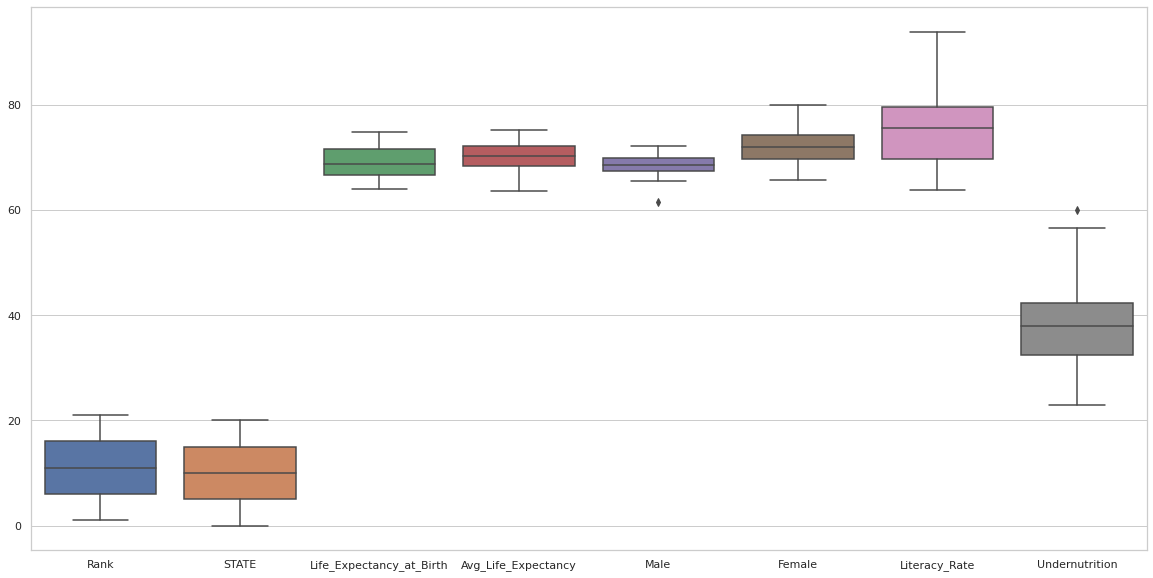

In [25]:
LifeExpectancyEDA.get_LifeExpectancy_Boxplot(life)

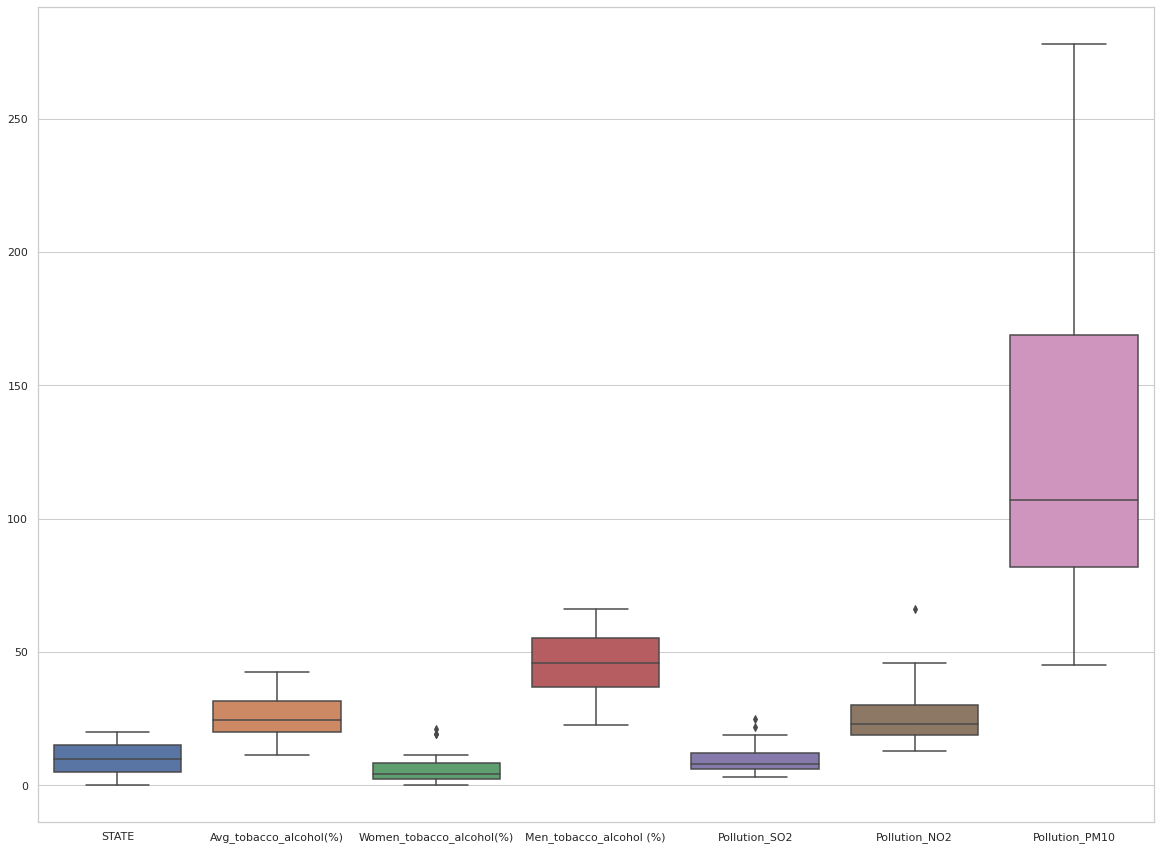

In [26]:
LifeExpectancyEDA.get_Pollution_Boxplot(pollution)

6. Plot features against each other using a pair plot.


In [27]:
def outliers(df,ft):
  Q1=df[ft].quantile(0.25)
  Q3=df[ft].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q1+1.5*IQR
  ls=df.index[(df[ft]<lower_bound) | (df[ft]>upper_bound)]
  return ls

In [28]:
index_list=[]
index_list.append(outliers(life,"Male"))

In [29]:
index_list[0]

Int64Index([3, 4, 8, 11], dtype='int64')

In [30]:
def remove(df,ls):
  ls=sorted(set(ls))
  df=df.drop(ls)
  return df

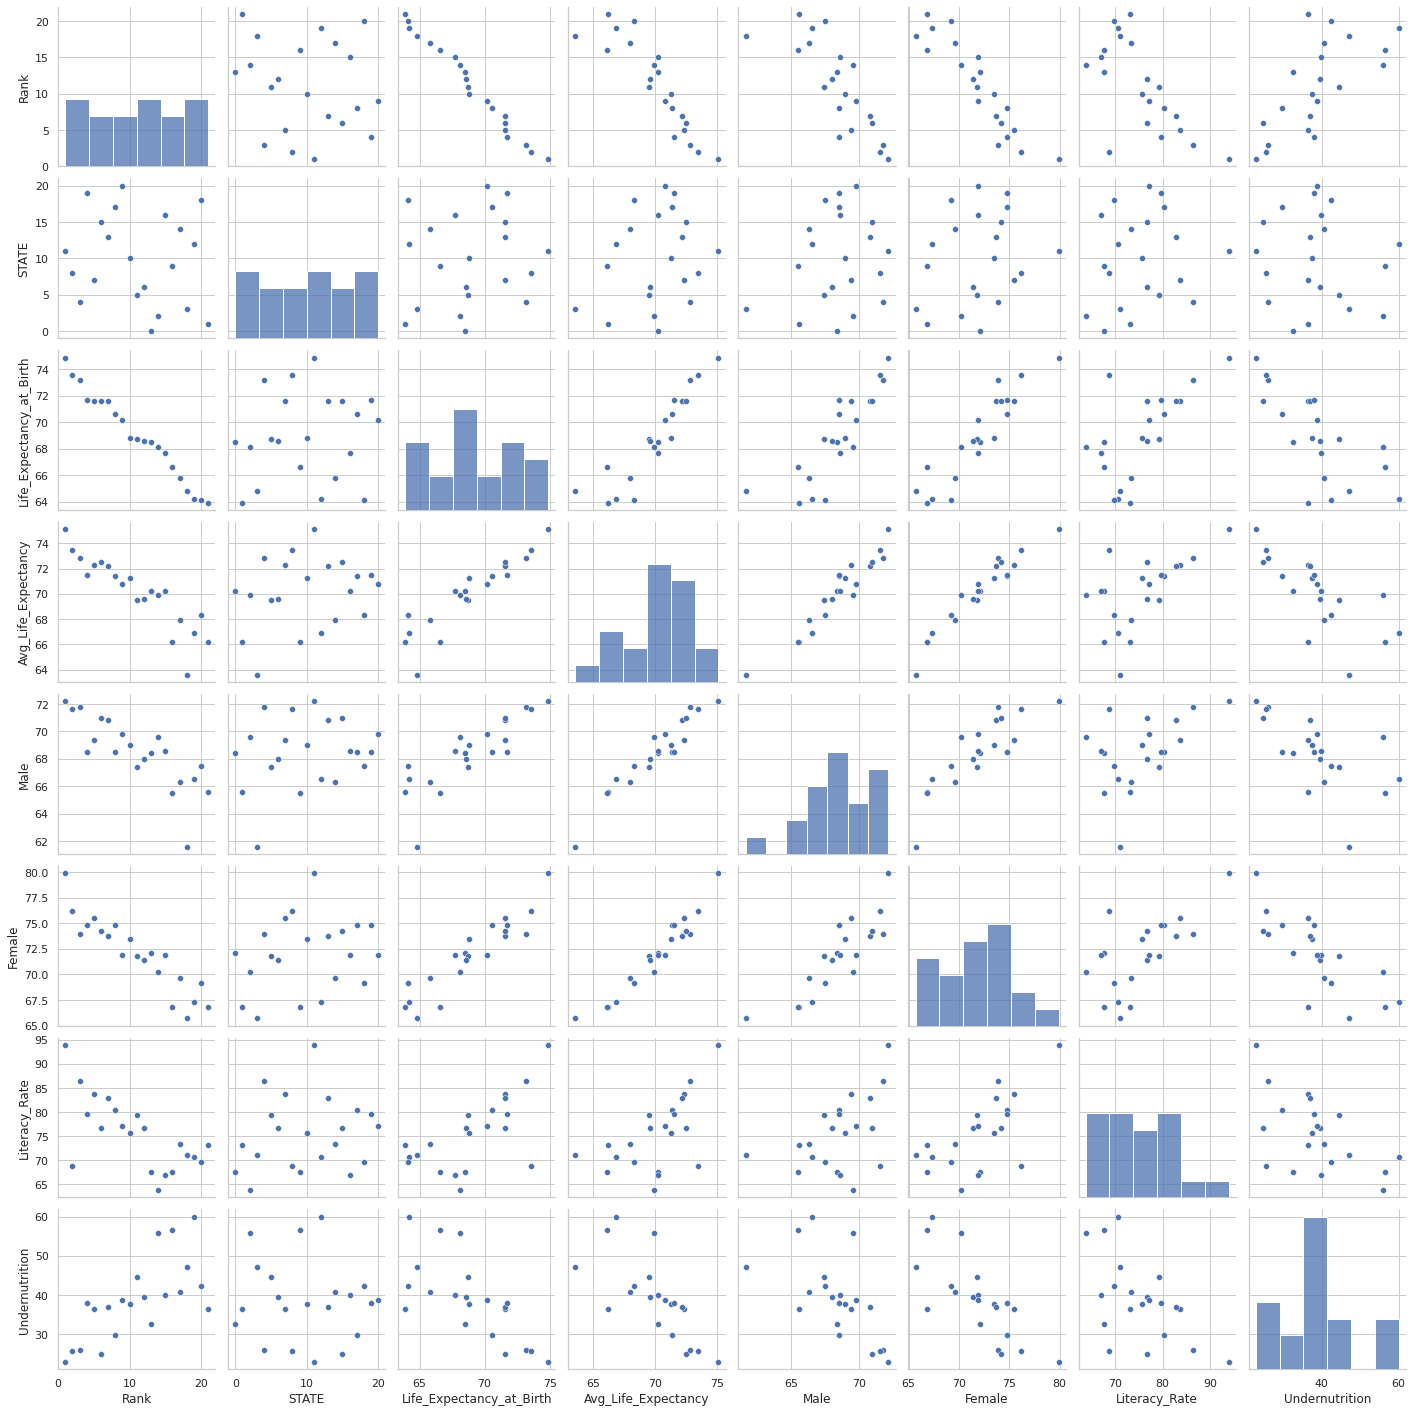

In [31]:
#sns.pairplot(data=life)
LifeExpectancyEDA.get_LifeExpectancy_Pairplot(life)

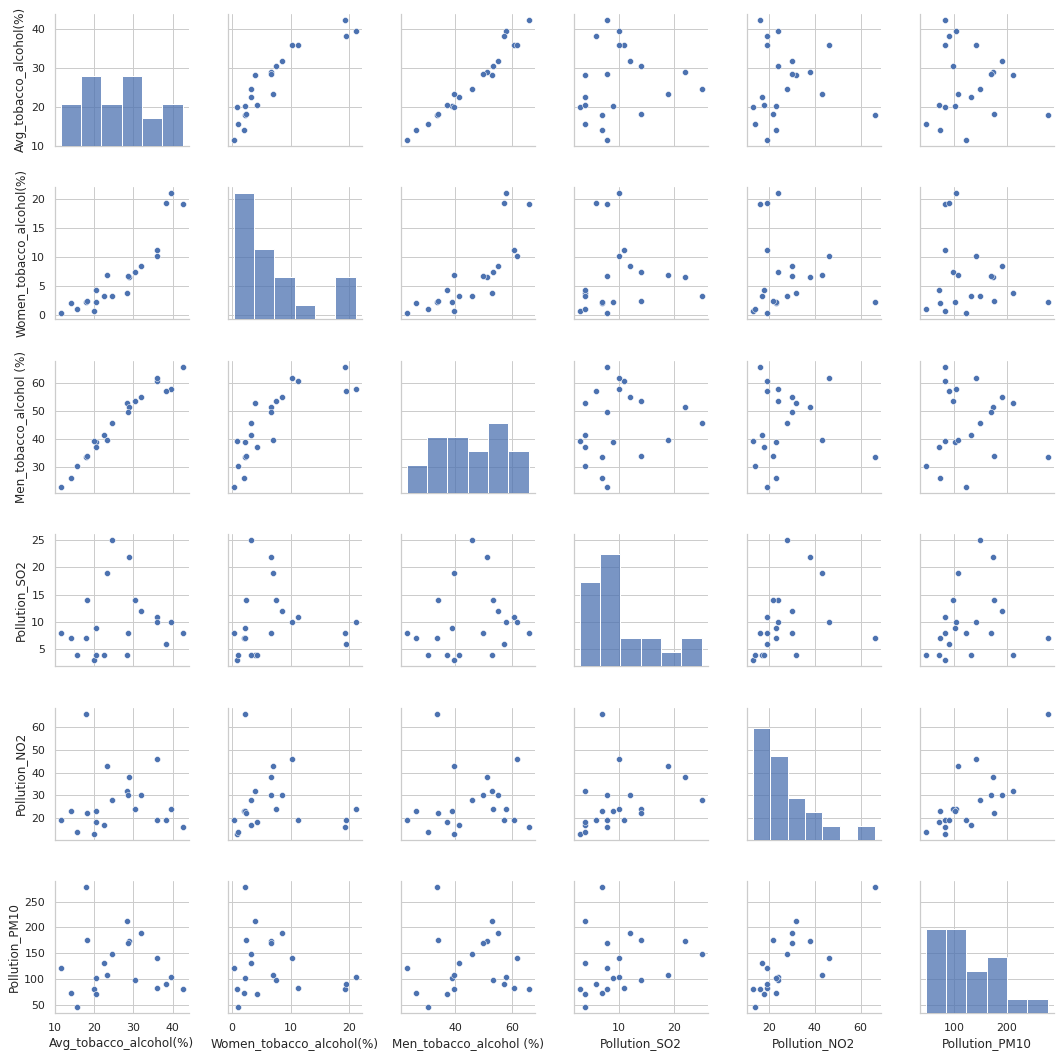

In [32]:
#sns.pairplot(data= DF_Pollution)
LifeExpectancyEDA.get_Pollution_Pairplot(DF_Pollution)

7. Use a HeatMap for finding the correlation between the features(Feature 
to Feature).

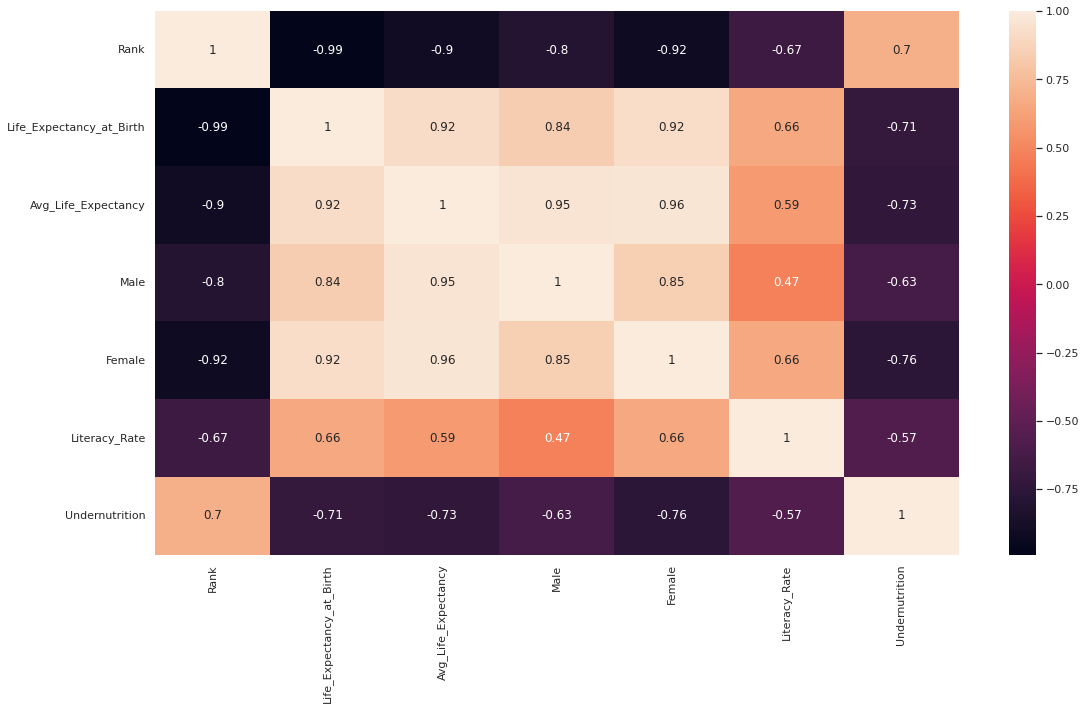

In [33]:
#plt.figure(figsize=(18,10))
#annot=True
#hm=sns.heatmap(life_Exp_DF_India.corr(),annot=annot)

LifeExpectancyEDA.get_LifeExpectancy_Heatmap(life_Exp_DF_India)

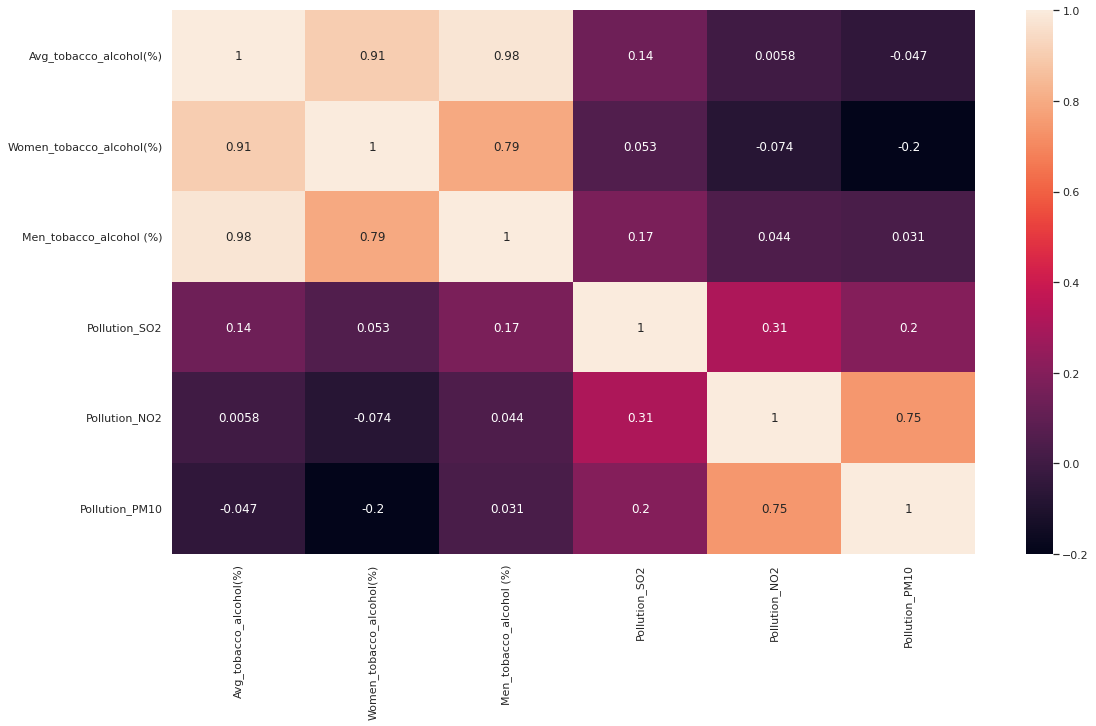

In [34]:
#plt.figure(figsize=(18,10))
#annot=True
#hm=sns.heatmap(DF_Pollution.corr(),annot=annot)
LifeExpectancyEDA.get_Pollution_Heatmap(DF_Pollution)

##9. Merging two Data Frames.

In [35]:
final = pd.concat([life, pollution.iloc[:,1:]], axis=1, join='inner')

In [36]:
final

,Rank,STATE,Life_Expectancy_at_Birth,Avg_Life_Expectancy,Male,Female,Literacy_Rate,Undernutrition,Avg_tobacco_alcohol(%),Women_tobacco_alcohol(%),Men_tobacco_alcohol (%),Pollution_SO2,Pollution_NO2,Pollution_PM10
0,13,0,68.5,70.25,68.4,72.1,67.66,32.5,14.05,2.100,26.00,7,23,73
1,21,1,63.9,66.20,65.6,66.8,73.18,36.4,42.50,19.250,65.95,8,16,81
2,14,2,68.1,69.90,69.6,70.2,63.82,55.9,28.33,3.820,52.85,4,32,212
3,18,3,64.8,63.60,61.6,65.7,71.04,47.1,39.50,21.070,58.05,10,24,103
4,3,4,73.2,72.85,71.8,73.9,86.34,26.1,17.84,2.150,33.53,7,66,278
5,11,5,68.7,69.50,67.4,71.8,79.31,44.6,30.47,7.500,53.45,14,24,98
6,12,6,68.6,69.60,68.0,71.4,76.64,39.6,20.33,2.200,38.70,9,23,101
7,5,7,71.6,72.30,69.4,75.5,83.78,36.5,20.02,0.750,39.30,3,13,81
8,2,8,73.6,73.50,71.6,76.2,68.74,25.6,22.45,3.250,41.34,4,17,131
9,16,9,66.6,66.15,65.5,66.8,67.63,56.5,28.90,6.580,51.27,22,38,174


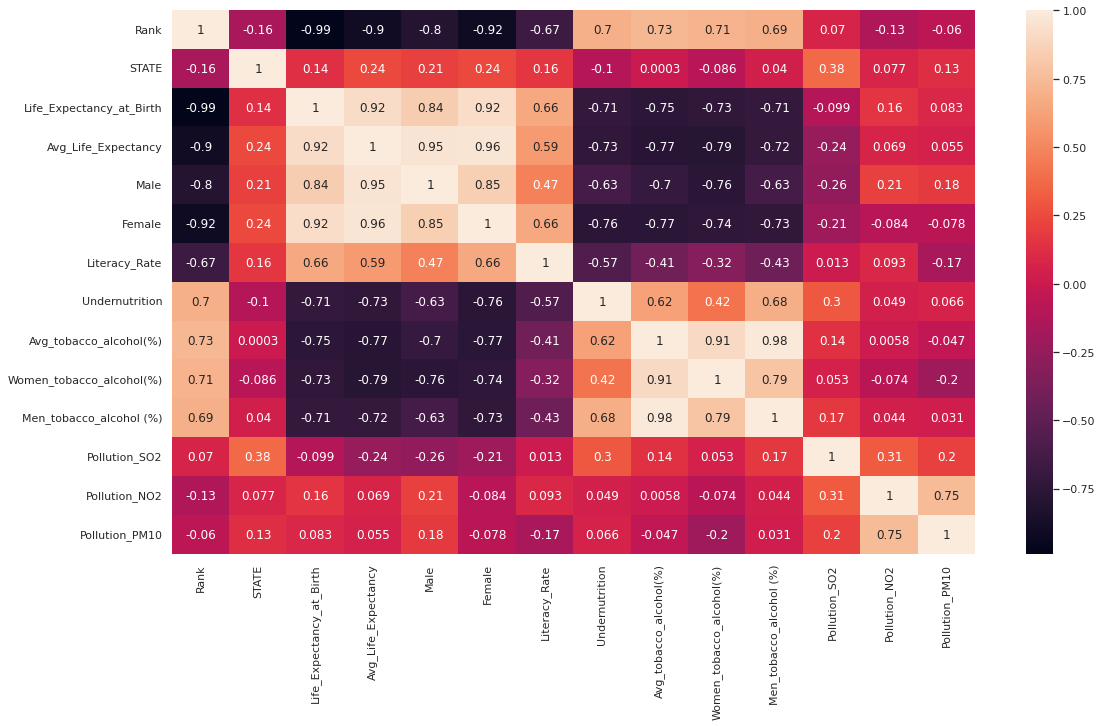

In [37]:
#plt.figure(figsize=(18,10))
#annot=True
#hm=sns.heatmap(final.corr(),annot=annot)
LifeExpectancyEDA.get_Complete_Heatmap(final)

In [38]:
final.iloc[0:,2:5]

,Life_Expectancy_at_Birth,Avg_Life_Expectancy,Male
0,68.5,70.25,68.4
1,63.9,66.20,65.6
2,68.1,69.90,69.6
3,64.8,63.60,61.6
4,73.2,72.85,71.8
5,68.7,69.50,67.4
6,68.6,69.60,68.0
7,71.6,72.30,69.4
8,73.6,73.50,71.6
9,66.6,66.15,65.5


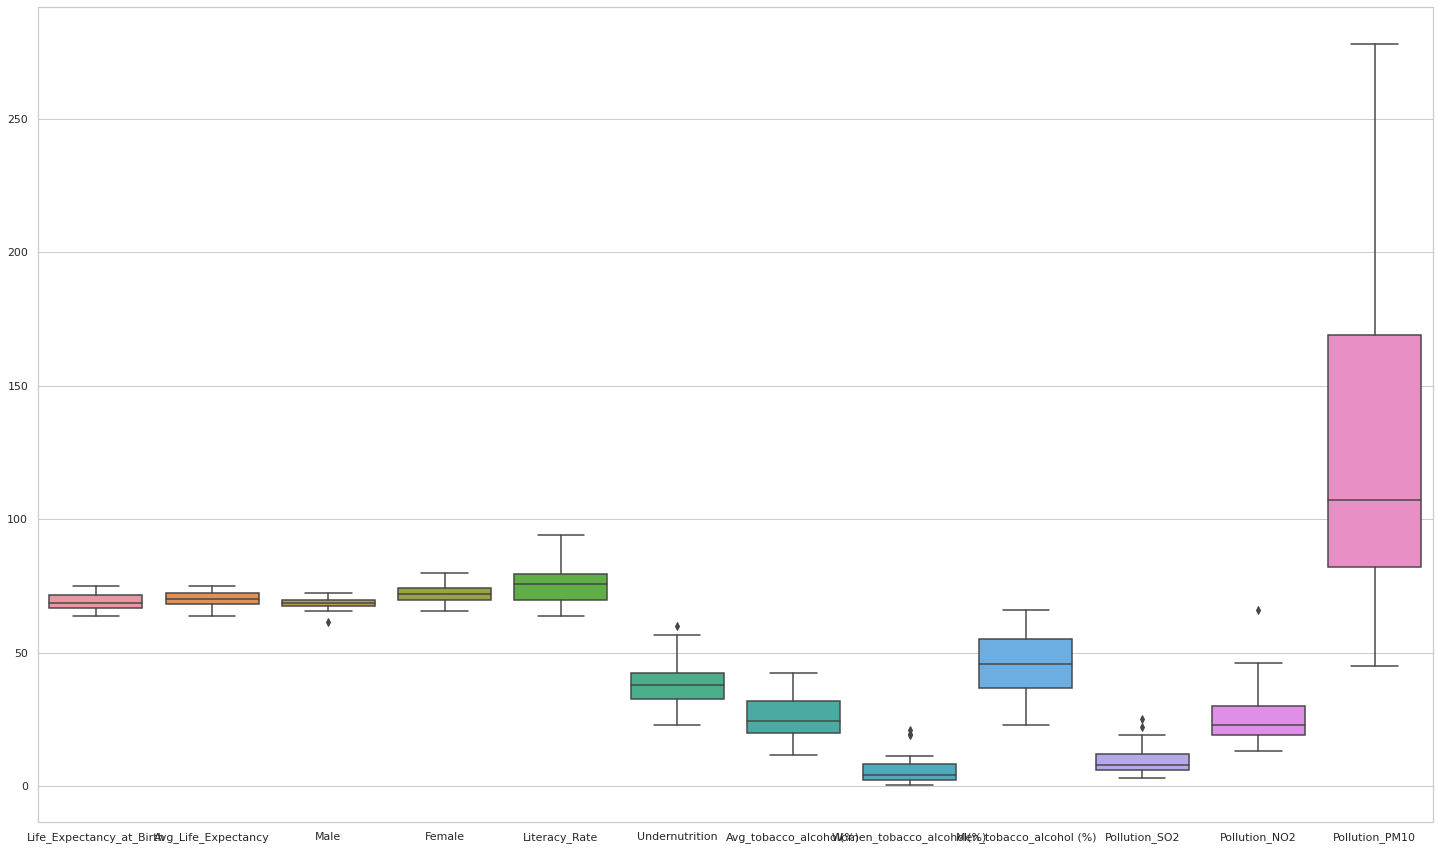

In [39]:
#sns.set(style='whitegrid')
#fig,ax=plt.subplots(figsize=(25,15))
#b=sns.boxplot(data=final.iloc[:,2:])
#plt.show()
LifeExpectancyEDA.get_Complete_Boxplot(final)

In [40]:
Final=final.iloc[:,2:]

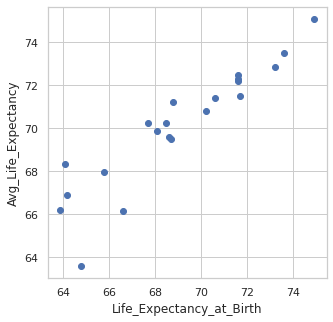

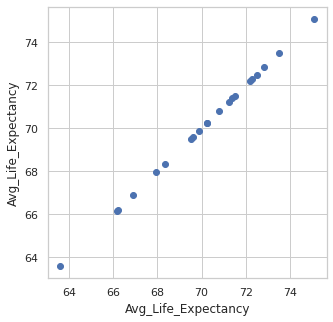

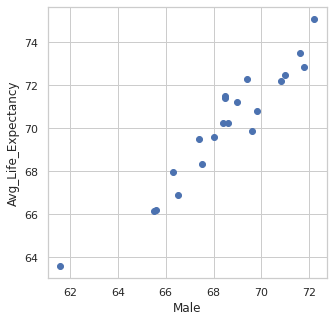

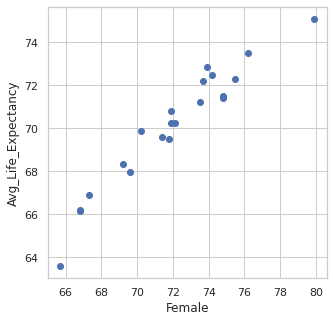

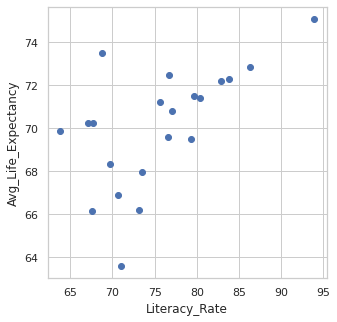

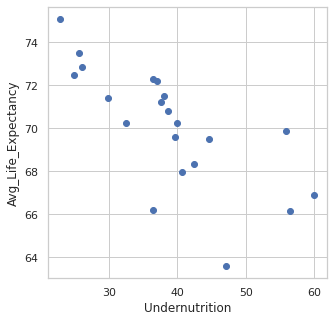

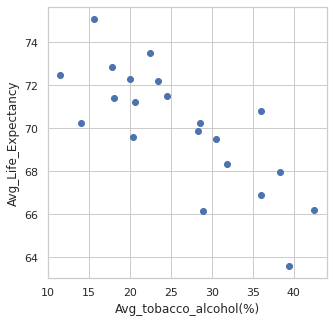

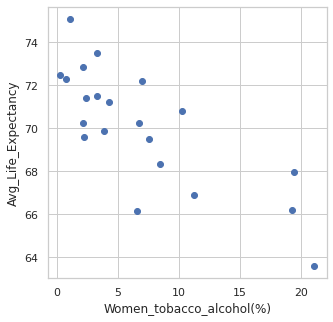

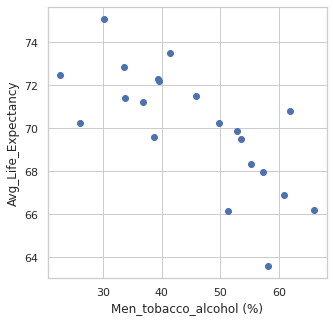

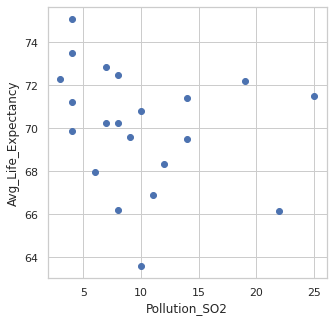

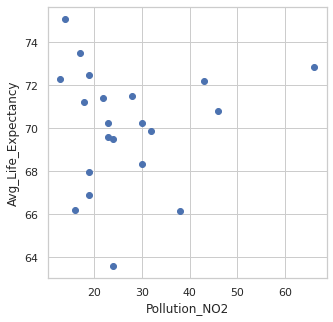

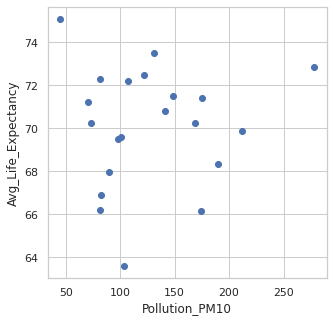

In [41]:
#for i in Final.columns:
#  sns.set(style='whitegrid')
#  fig,ax=plt.subplots(figsize=(5,5))
#  plt.scatter(x=Final[i],y=Final["Avg_Life_Expectancy"])
#  plt.xlabel("{}".format(i))
#  plt.ylabel("Avg_Life_Expectancy")
LifeExpectancyEDA.get_Complete_Subplot(Final)

<Figure size 1080x1440 with 0 Axes>

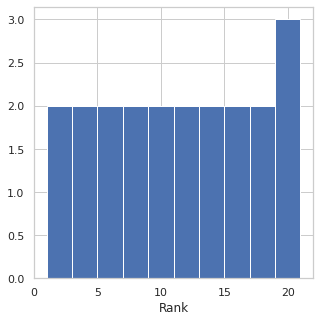

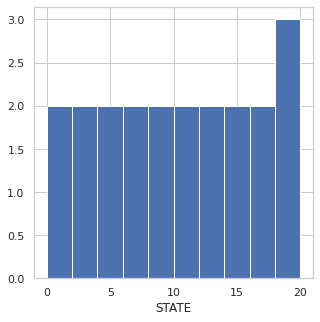

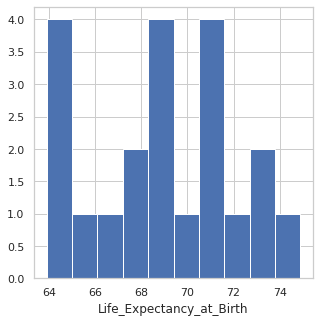

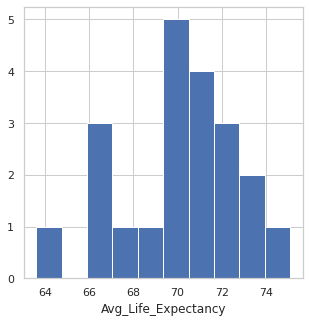

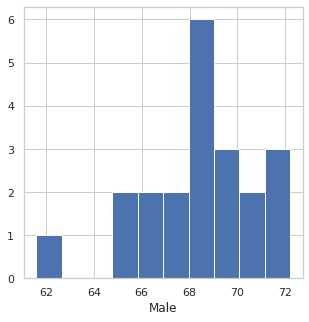

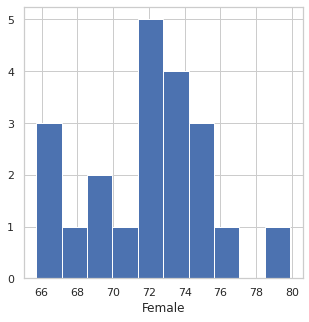

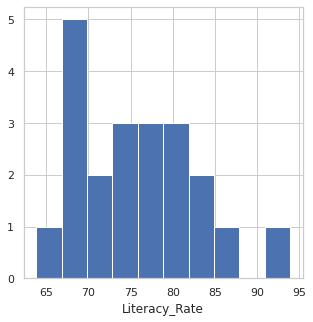

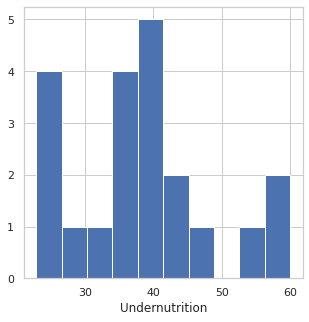

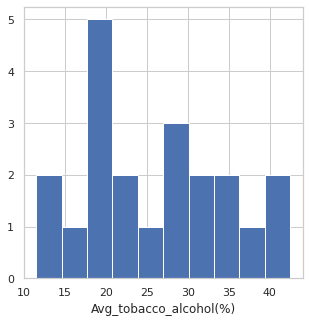

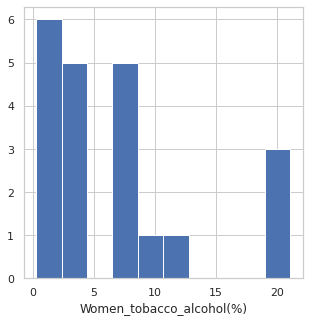

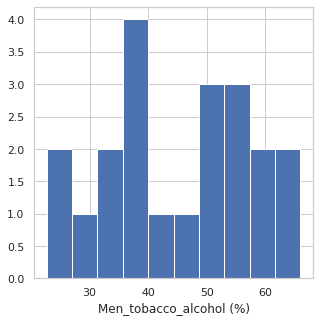

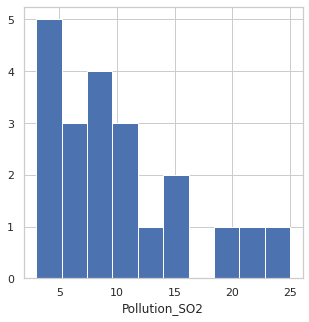

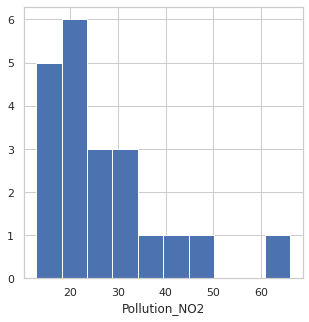

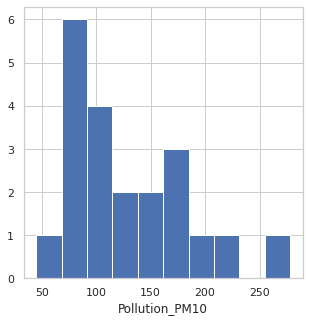

In [42]:
LifeExpectancyEDA.get_Complete_Subplot_Hist(final)

In [43]:
final.columns

Index(['Rank', 'STATE', 'Life_Expectancy_at_Birth', 'Avg_Life_Expectancy',
       'Male', 'Female', 'Literacy_Rate', 'Undernutrition',
       'Avg_tobacco_alcohol(%)', 'Women_tobacco_alcohol(%)',
       'Men_tobacco_alcohol (%)', 'Pollution_SO2', 'Pollution_NO2',
       'Pollution_PM10'],
      dtype='object')

In [44]:
feature=['Life_Expectancy_at_Birth', 'Avg_Life_Expectancy',
       'Male', 'Female', 'Literacy_Rate', 'Undernutrition',
       'Avg_tobacco_alcohol(%)', 'Women_tobacco_alcohol(%)',
       'Men_tobacco_alcohol (%)', 'Pollution_SO2', 'Pollution_NO2',
       'Pollution_PM10']

In [45]:
df_1=list(enumerate(feature))

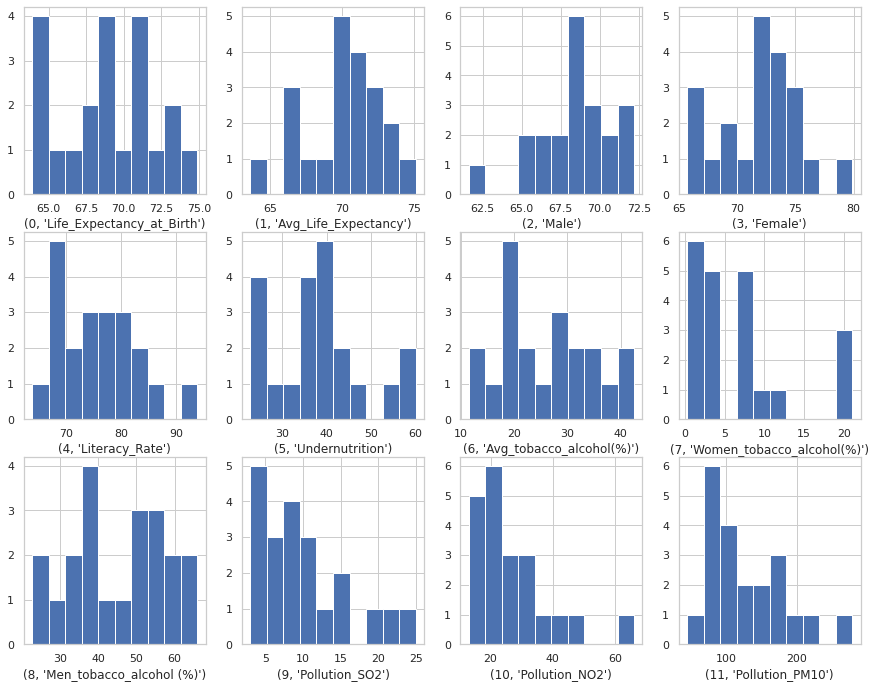

In [56]:
#plt.figure(figsize=(15, 20))
#for i in enumerate(feature):
#    plt.subplot(5, 4, i[0]+1)
#    plt.hist(i[1],data=final)
#    plt.xlabel("{}".format(i))
LifeExpectancyEDA.get_Complete_Hist(feature,final)

In [47]:
df=pd.DataFrame(final.iloc[0:,3:4])
df.loc[df['Avg_Life_Expectancy'] >= 70.097619, 'equal_or_greater_than_mean?'] = 'True' 
df.loc[df['Avg_Life_Expectancy'] < 70.097619, 'equal_or_greater_than_mean?'] = 'False' 
print(df)

    Avg_Life_Expectancy equal_or_greater_than_mean?
0                 70.25                        True
1                 66.20                       False
2                 69.90                       False
3                 63.60                       False
4                 72.85                        True
5                 69.50                       False
6                 69.60                       False
7                 72.30                        True
8                 73.50                        True
9                 66.15                       False
10                71.25                        True
11                75.10                        True
12                66.90                       False
13                72.20                        True
14                67.95                       False
15                72.50                        True
16                70.25                        True
17                71.40                        True
18          

19. Use of Args and Kwargs

In [48]:
def literacyRate(*argv):
  highLiteracyCount = 0
  lowLiteracyCount = 0
  index = 0
  for i in final['Literacy_Rate']:
    if i > 70.00:
      highLiteracyCount += 1
    elif i <= 70.00:
      lowLiteracyCount = lowLiteracyCount + 1
  print("The Total number of States having Low Literacy Rate are {} \nand States with States with High Literacy Rate are {}".format(lowLiteracyCount,highLiteracyCount))

In [49]:
literacyRate(final)

The Total number of States having Low Literacy Rate are 6 
and States with States with High Literacy Rate are 15


15. **Using Mathematical and Statistical Functions using libraries**

In [50]:
class LifeExpectancyDataNumerical():

    def get_Ceil():
      life_Exp_India['Undernutrition'] = life_Exp_India['Undernutrition'].apply(np.ceil)
      return life_Exp_India
      
    def get_floor():
      life_Exp_India['Undernutrition'] = life_Exp_India['Undernutrition'].apply(np.floor)
      return life_Exp_India

In [51]:
LifeExpectancyDataNumerical.get_Ceil()

,Rank,State,Life_Expectancy_at_Birth,Avg_Life_Expectancy,Male,Female,Literacy_Rate,Undernutrition
0,13,Andhra Pradesh,68.5,70.25,68.4,72.1,67.66,33.0
1,21,Assam,63.9,66.20,65.6,66.8,73.18,37.0
2,14,Bihar,68.1,69.90,69.6,70.2,63.82,56.0
3,18,Chhattisgarh,64.8,63.60,61.6,65.7,71.04,48.0
4,3,Delhi,73.2,72.85,71.8,73.9,86.34,27.0
5,11,Gujarat,68.7,69.50,67.4,71.8,79.31,45.0
6,12,Haryana,68.6,69.60,68.0,71.4,76.64,40.0
7,5,Himachal Pradesh,71.6,72.30,69.4,75.5,83.78,37.0
8,2,Jammu & Kashmir,73.6,73.50,71.6,76.2,68.74,26.0
9,16,Jharkhand,66.6,66.15,65.5,66.8,67.63,57.0


In [53]:
LifeExpectancyDataNumerical.get_floor()

,Rank,State,Life_Expectancy_at_Birth,Avg_Life_Expectancy,Male,Female,Literacy_Rate,Undernutrition
0,13,Andhra Pradesh,68.5,70.25,68.4,72.1,67.66,33.0
1,21,Assam,63.9,66.20,65.6,66.8,73.18,37.0
2,14,Bihar,68.1,69.90,69.6,70.2,63.82,56.0
3,18,Chhattisgarh,64.8,63.60,61.6,65.7,71.04,48.0
4,3,Delhi,73.2,72.85,71.8,73.9,86.34,27.0
5,11,Gujarat,68.7,69.50,67.4,71.8,79.31,45.0
6,12,Haryana,68.6,69.60,68.0,71.4,76.64,40.0
7,5,Himachal Pradesh,71.6,72.30,69.4,75.5,83.78,37.0
8,2,Jammu & Kashmir,73.6,73.50,71.6,76.2,68.74,26.0
9,16,Jharkhand,66.6,66.15,65.5,66.8,67.63,57.0


In [54]:
np_dl = final['Avg_Life_Expectancy'].to_numpy()
np_dl

array([70.25, 66.2 , 69.9 , 63.6 , 72.85, 69.5 , 69.6 , 72.3 , 73.5 ,
       66.15, 71.25, 75.1 , 66.9 , 72.2 , 67.95, 72.5 , 70.25, 71.4 ,
       68.35, 71.5 , 70.8 ])